# An Empirical Comparison of Supervised and Self-Supervised Learning

In [50]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [52]:
conv_args = TrainArgs(batchsize = 10)

In [53]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.298
[epoch: 0, i:   999] avg mini-batch loss: 2.256
[epoch: 0, i:  1499] avg mini-batch loss: 2.096
[epoch: 1, i:   499] avg mini-batch loss: 1.886
[epoch: 1, i:   999] avg mini-batch loss: 1.825
[epoch: 1, i:  1499] avg mini-batch loss: 1.781
[epoch: 2, i:   499] avg mini-batch loss: 1.671
[epoch: 2, i:   999] avg mini-batch loss: 1.646
[epoch: 2, i:  1499] avg mini-batch loss: 1.607
[epoch: 3, i:   499] avg mini-batch loss: 1.543
[epoch: 3, i:   999] avg mini-batch loss: 1.533
[epoch: 3, i:  1499] avg mini-batch loss: 1.510
[epoch: 4, i:   499] avg mini-batch loss: 1.453
[epoch: 4, i:   999] avg mini-batch loss: 1.447
[epoch: 4, i:  1499] avg mini-batch loss: 1.433
[epoch: 5, i:   499] avg mini-batch loss: 1.378
[epoch: 5, i:   999] avg mini-batch loss: 1.336
[epoch: 5, i:  1499] avg mini-batch loss: 1.385
[epoch: 6, i:   499] avg mini-batch loss: 1.

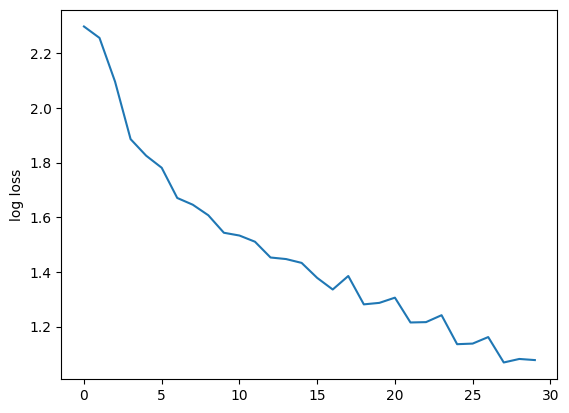

In [54]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [55]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Files already downloaded and verified
Baseline accuracy of the convolutional model is 54.71904761904762 %


## Momentum Contrast

### Pre-Training the Encoder

In [56]:
encoder_args = TrainArgs(epochs = 20)

In [57]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.044063
Train Epoch: 2 	Loss: 0.027133
Train Epoch: 3 	Loss: 0.018409
Train Epoch: 4 	Loss: 0.013050
Train Epoch: 5 	Loss: 0.009989
Train Epoch: 6 	Loss: 0.007953
Train Epoch: 7 	Loss: 0.006555
Train Epoch: 8 	Loss: 0.005700
Train Epoch: 9 	Loss: 0.005024
Train Epoch: 10 	Loss: 0.004502
Train Epoch: 11 	Loss: 0.004013
Train Epoch: 12 	Loss: 0.003820
Train Epoch: 13 	Loss: 0.003580
Train Epoch: 14 	Loss: 0.003404
Train Epoch: 15 	Loss: 0.003291
Train Epoch: 16 	Loss: 0.003100
Train Epoch: 17 	Loss: 0.003029
Train Epoch: 18 	Loss: 0.002907
Train Epoch: 19 	Loss: 0.002769
Train Epoch: 20 	Loss: 0.002701


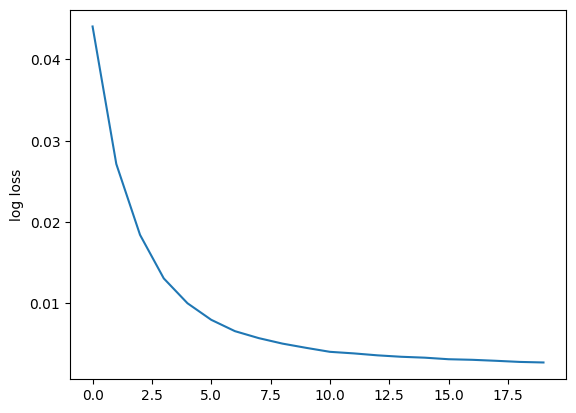

In [58]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [59]:
data, targets = encode_data()

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 42000/42000 [08:15<00:00, 84.82it/s]


In [60]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified
Files already downloaded and verified


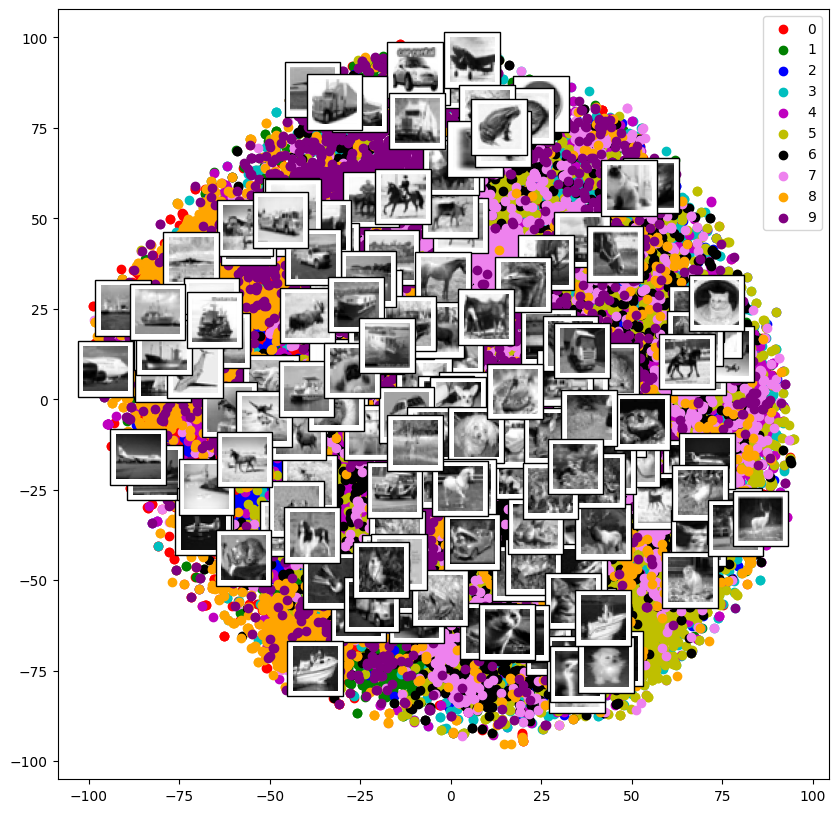

In [61]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [62]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 18000/18000 [03:31<00:00, 85.05it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 42000/42000 [08:14<00:00, 84.98it/s]


In [63]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [64]:
svm.score(X_test, y_test)

0.5769285714285715

### Multiple Runs

In [65]:
# subsample so things run faster
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 18000/18000 [03:32<00:00, 84.65it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 42000/42000 [08:17<00:00, 84.50it/s]


In [66]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [67]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=False)
    conv_errors.append(test_conv(ConvNet, subsample=False)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.293
[epoch: 0, i:  1499] avg mini-batch loss: 2.252
[epoch: 1, i:   499] avg mini-batch loss: 2.101
[epoch: 1, i:   999] avg mini-batch loss: 1.985
[epoch: 1, i:  1499] avg mini-batch loss: 1.915
[epoch: 2, i:   499] avg mini-batch loss: 1.792
[epoch: 2, i:   999] avg mini-batch loss: 1.734
[epoch: 2, i:  1499] avg mini-batch loss: 1.701
[epoch: 3, i:   499] avg mini-batch loss: 1.644
[epoch: 3, i:   999] avg mini-batch loss: 1.600
[epoch: 3, i:  1499] avg mini-batch loss: 1.575
[epoch: 4, i:   499] avg mini-batch loss: 1.511
[epoch: 4, i:   999] avg mini-batch loss: 1.517
[epoch: 4, i:  1499] avg mini-batch loss: 1.479
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499]

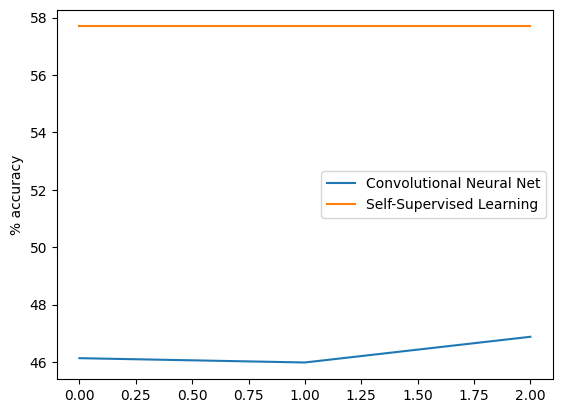

In [68]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [69]:
conv_errors

[46.13333333333333, 45.983333333333334, 46.87857142857143]

In [70]:
svm_errors

[0.5769285714285715, 0.5769285714285715, 0.5769285714285715]

In [71]:
conv_errors

[46.13333333333333, 45.983333333333334, 46.87857142857143]